# Bagging and Random Forest 
**Instrcutor:** Asim Shah  
**Objective:**  

1. Show how Random Forest generalizes it  
2. Build a **custom Bagging model** using multiple models (DT, KNN, Logistic Regression)  
3. Compare all results  


In [1]:
# =============================================================
# Libraries
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# =============================================================
# Dataset: Heart Disease (UCI)
# =============================================================
# Step 1 — Load and Explore Dataset
def load_heart_data():
    url = "heart.csv"
    df = pd.read_csv(url)
    return df

df = load_heart_data()
print("Shape:", df.shape)
df.head()


Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


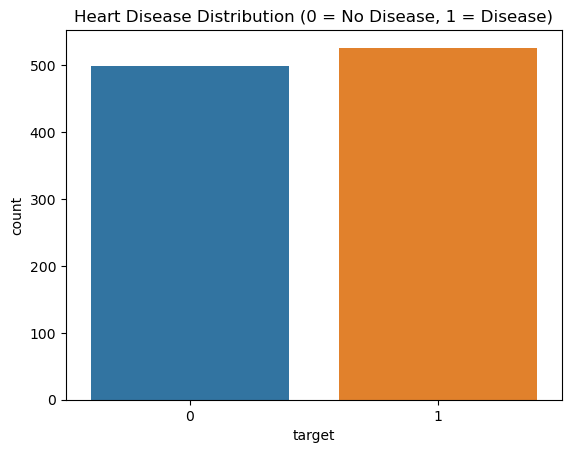

In [3]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No Disease, 1 = Disease)")
plt.show()


In [4]:

# Step 2 — Split Data
def split_data(df):
    X = df.drop("target", axis=1)
    y = df["target"]
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = split_data(df)


In [5]:
# Step 3 — Random Forest (for Comparison)

def train_random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return acc, preds

rf_acc, rf_preds = train_random_forest(X_train, y_train, X_test, y_test)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.926829268292683


In [6]:
rf_preds

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [7]:
# Step 4 — Train Custom Bagger
from sklearn.utils import resample
from scipy.stats import mode
def bagger_fit_predict(model_fns, X_train, y_train, X_test, n_estimators=15):
    all_preds = []
    for fn in model_fns:
        for _ in range(n_estimators):
            # Bootstrap sample
            X_bs, y_bs = resample(X_train, y_train, replace=True)
            # Build model
            model = fn()
            # Fit model
            model.fit(X_bs, y_bs)
            # Predict test set
            preds = model.predict(X_test)
            all_preds.append(preds)

    all_preds = np.array(all_preds)  # shape → (models*estimators, n_samples)
    final_preds = mode(all_preds, axis=0).mode  # majority vote
    return final_preds.ravel()

# ----------------- Your bagging ensemble ------------------
model_list = [
    lambda: DecisionTreeClassifier(max_depth=5),
    lambda: KNeighborsClassifier(n_neighbors=5),
    lambda: LogisticRegression(max_iter=50)
]
bagger_preds = bagger_fit_predict(
    model_fns=model_list,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    n_estimators=15
)
bagger_acc = accuracy_score(y_test, bagger_preds)
print("Custom Bagger Accuracy:", bagger_acc)

Custom Bagger Accuracy: 0.8585365853658536


C:\Users\ASIM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASIM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

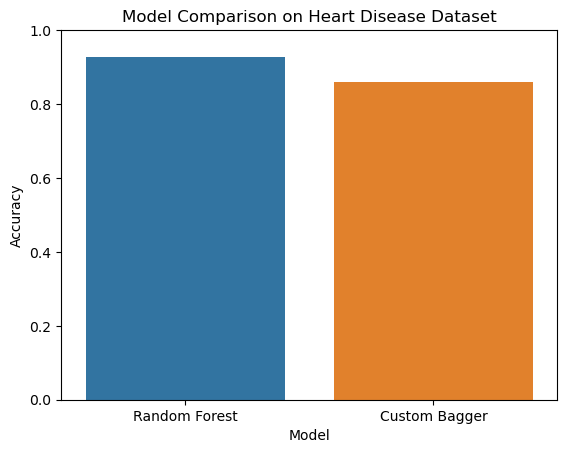

,Model,Accuracy
0,Random Forest,0.926829
1,Custom Bagger,0.858537


In [8]:

# Step 5 — Compare All Models

results = pd.DataFrame({
    "Model": ["Random Forest", "Custom Bagger"],
    "Accuracy": [rf_acc, bagger_acc]
})

sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Model Comparison on Heart Disease Dataset")
plt.ylim(0, 1)
plt.show()

results


In [9]:

#  Step 6 — Evaluation Report

print("Classification Report (Custom Bagger):")
print(classification_report(y_test, bagger_preds))


Classification Report (Custom Bagger):
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       100
           1       0.83      0.91      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205




### Summary Table

| Model | Type | Control Overfitting | Diversity Source |
|--------|------|--------------------|------------------|
| Decision Tree | Single Learner | None | — |
| Bagging (DT) | Ensemble (same model) | Bootstrap Sampling | Data Samples |
| Random Forest | Ensemble (DTs) | Bootstrap + Random Features | Data + Features |
| Custom Bagger | Ensemble (Mixed Models) | Bootstrap + Model Variety | Data + Models |
